In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckd-desease/dataset_full.csv
/kaggle/input/ckd-desease/dataset_desease.csv


In [3]:
data_full = pd.read_csv('../input/ckd-desease/dataset_full.csv',na_values='?')
data_desease = pd.read_csv('../input/ckd-desease/dataset_desease.csv',na_values='?')

In [4]:
data_full.describe()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,Packed _Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood_Pressure           388 non-null    float64
 2   Specific_Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red_Blood_Cells          248 non-null    object 
 6   Pus_Cell                 335 non-null    object 
 7   Pus_Cell_clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood_Glucose_Random     356 non-null    float64
 10  Blood_Urea               381 non-null    float64
 11  Serum_Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [6]:
df_num_col = []
df_cat_col = []
for col in data_full.columns :
    if data_full[col].dtype == 'object':
        df_cat_col.append(col)
    else:
        df_num_col.append(col)

In [7]:
df_num = data_full[df_num_col]
df_cat = data_full[df_cat_col]

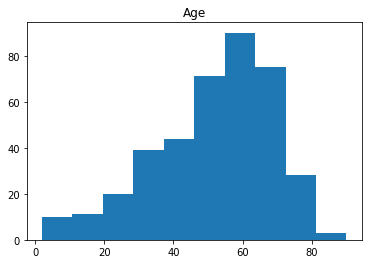

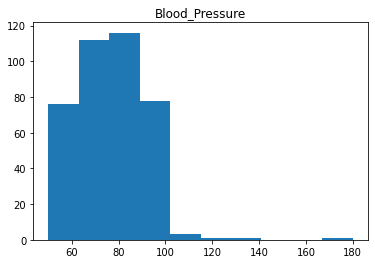

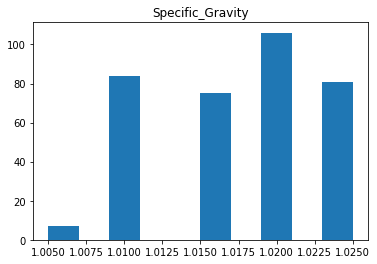

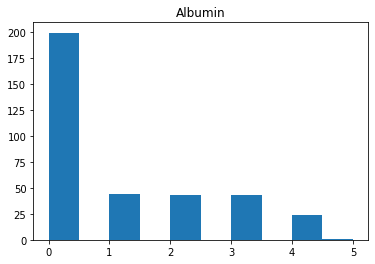

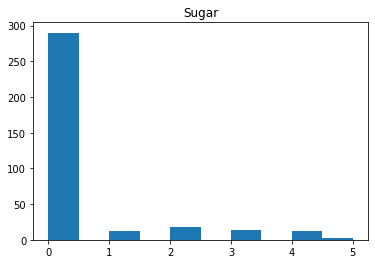

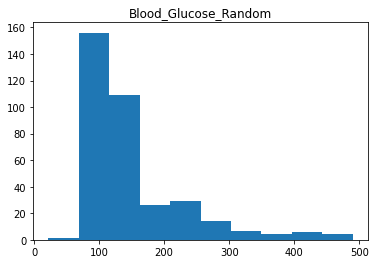

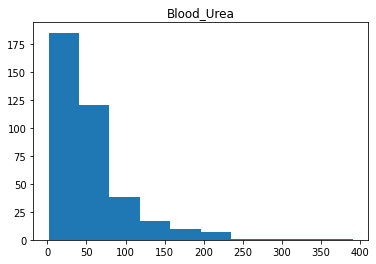

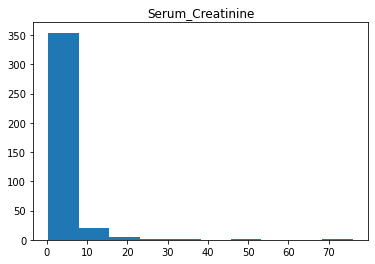

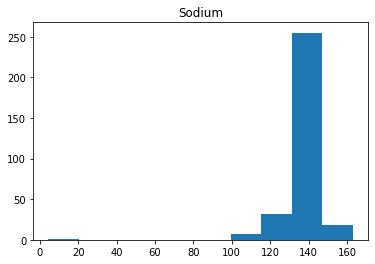

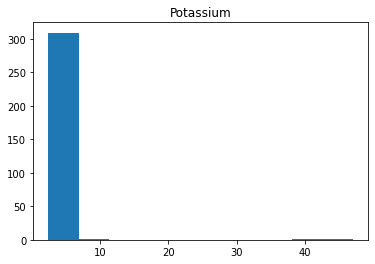

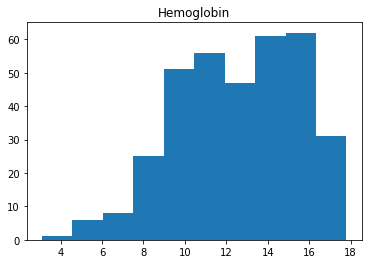

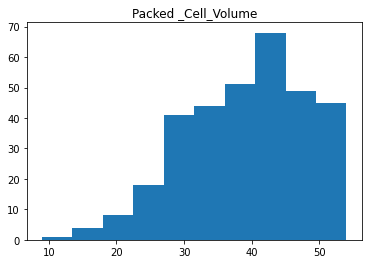

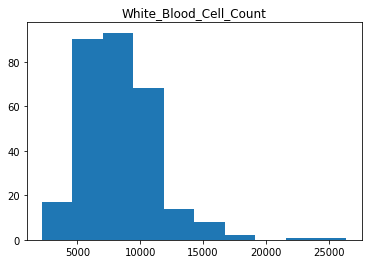

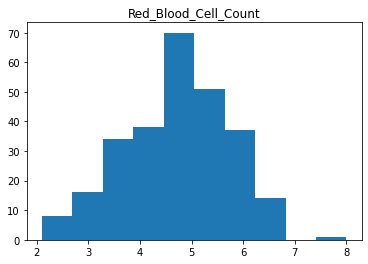

In [8]:
for i in df_num_col :
    plt.hist(data_full[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

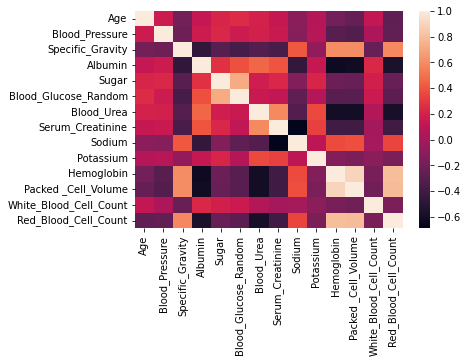

In [9]:
sns.heatmap(df_num.corr())

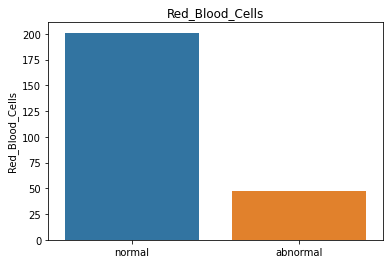

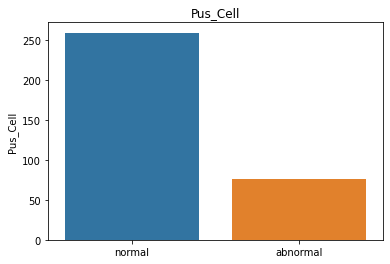

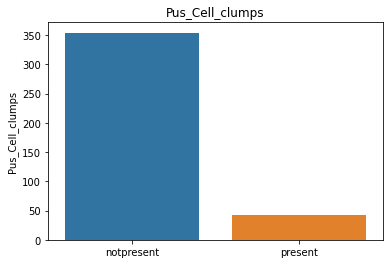

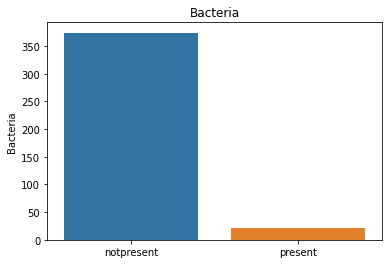

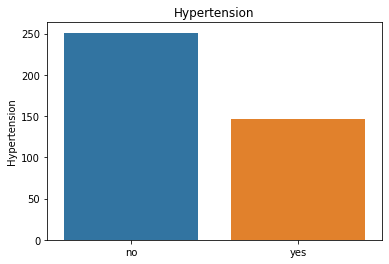

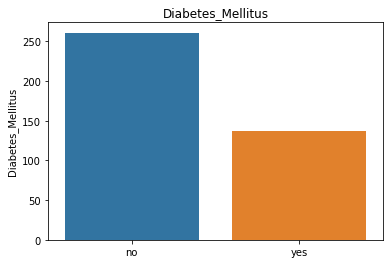

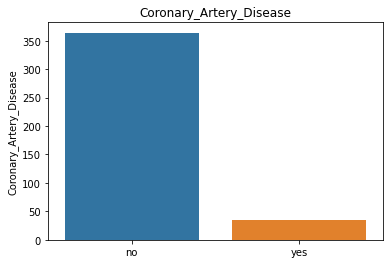

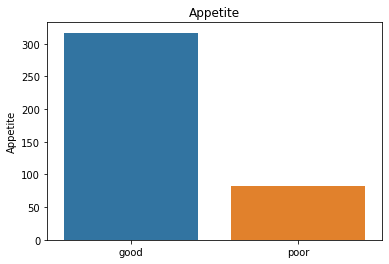

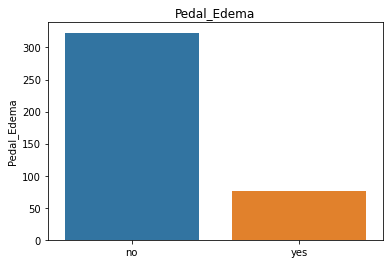

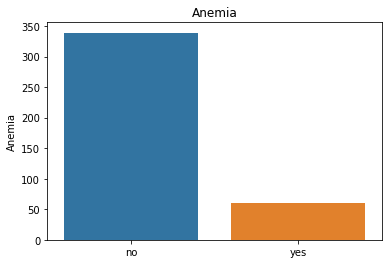

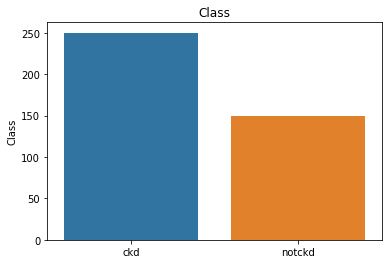

In [10]:
for col in df_cat.columns :
    sns.barplot(x = data_full[col].value_counts().index,y =data_full[col].value_counts()).set_title(col)
    plt.show()

# Red_Blood_Cells  normal= 1, abnormal= 0
# Pus_Cell normal = 1, abnormal= 0
# Pus_Cell_clumps present = 1, notpresent = 0
# Bacteria present = 1, notpresent = 0
# Hypertension yes = 1, no = 0
# Diabetes_Mellitus yes = 1, no = 0
# Coronary_Artery_Disease yes = 1, no = 0
# Appetite good = 1, poor = 0
# Pedal_Edema yes = 1, no = 0
# Anemia yes = 1, no = 0
# Class ckd = 1, notckd = 0


In [26]:
data_full

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_clumps,Bacteria,Blood_Glucose_Random,...,Packed _Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [47]:
data_full_remplace = data_full.copy()

In [48]:
data_full_remplace = data_full_remplace.replace('yes',1)
data_full_remplace = data_full_remplace.replace('no',0)

data_full_remplace = data_full_remplace.replace('present',1)
data_full_remplace = data_full_remplace.replace('notpresent',0)

data_full_remplace = data_full_remplace.replace('normal',1)
data_full_remplace = data_full_remplace.replace('abnormal',0)

data_full_remplace = data_full_remplace.replace('good',1)
data_full_remplace = data_full_remplace.replace('poor',0)

data_full_remplace = data_full_remplace.replace('ckd',1)
data_full_remplace = data_full_remplace.replace('notckd',0)

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_clumps,Bacteria,Blood_Glucose_Random,...,Packed _Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [49]:
for col in df_num_col :
    data_full_remplace[col]= data_full_remplace[col].fillna(data_full_remplace[col].mean())

In [51]:
# 1ere idée pour les models : drop la colonne Red_Blood_Cells et Pus_Cell qui contient 38% et 18% d'inconnues
drop_col = ['Red_Blood_Cells','Pus_Cell']
# les autres on remplace par la médiane
data_full_remplace_drop = data_full_remplace.copy()
data_full_remplace_drop=data_full_remplace_drop.drop(['Red_Blood_Cells','Pus_Cell'],axis=1)

for col in df_cat_col :
    if col != 'Red_Blood_Cells' and col != 'Pus_Cell' :
        data_full_remplace_drop[col]= data_full_remplace_drop[col].fillna(data_full_remplace_drop[col].median())

In [53]:
X = data_full_remplace_drop.copy().drop(['Class'],axis=1)
y = data_full_remplace_drop['Class']

In [54]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0,train_size=0.8, test_size=0.2)

In [75]:
from sklearn.model_selection import cross_val_score 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression 
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Pus_Cell_clumps,Bacteria,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,...,Hemoglobin,Packed _Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia
336,25.000000,60.0,1.020000,0.000000,0.000000,0.0,0.0,119.000000,27.000000,0.500000,...,15.200000,40.000000,9200.000000,5.200000,0.0,0.0,0.0,1.0,0.0,0.0
64,55.000000,80.0,1.010000,0.000000,0.000000,0.0,0.0,146.000000,57.425722,3.072454,...,9.800000,38.884498,8406.122449,4.707435,0.0,0.0,0.0,1.0,0.0,0.0
55,35.000000,80.0,1.005000,3.000000,0.000000,0.0,0.0,148.036517,57.425722,3.072454,...,9.500000,28.000000,8406.122449,4.707435,0.0,0.0,0.0,1.0,1.0,0.0
106,50.000000,90.0,1.017408,1.016949,0.450142,0.0,0.0,89.000000,118.000000,6.100000,...,6.000000,17.000000,6500.000000,4.707435,1.0,1.0,0.0,1.0,1.0,1.0
300,45.000000,60.0,1.020000,0.000000,0.000000,0.0,0.0,114.000000,26.000000,0.700000,...,15.000000,43.000000,9200.000000,5.800000,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,43.000000,80.0,1.025000,0.000000,0.000000,0.0,0.0,130.000000,30.000000,1.100000,...,15.900000,45.000000,7800.000000,4.500000,0.0,0.0,0.0,1.0,0.0,0.0
192,46.000000,110.0,1.015000,0.000000,0.000000,0.0,0.0,130.000000,16.000000,0.900000,...,12.526437,38.884498,8406.122449,4.707435,0.0,0.0,0.0,1.0,0.0,0.0
117,51.483376,70.0,1.020000,0.000000,0.000000,0.0,0.0,219.000000,36.000000,1.300000,...,12.500000,37.000000,9800.000000,4.400000,0.0,0.0,0.0,1.0,0.0,0.0
47,11.000000,80.0,1.010000,3.000000,0.000000,0.0,0.0,148.036517,17.000000,0.800000,...,15.000000,45.000000,8600.000000,4.707435,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
# Model training

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [59]:
def clf_performance(classifier,model_name):
    print(model_name)
    print('Best score is : ',str(classifier.best_score_))
    print('Best parameter is : ',str(classifier.best_params_))

In [60]:
lr = LogisticRegression()
param_grid = {'max_iter':[2000],
              'penalty':['l1','l2'],
              'C':np.logspace(-4,4,20),
              'solver':['liblinear']}
clf_lr = GridSearchCV(lr,param_grid = param_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_lr = clf_lr.fit(train_X,train_y)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best score is :  0.96875
Best parameter is :  {'C': 78.47599703514607, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [61]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[3,5,7,9,10,11,14,15],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree'],
              'p':[1,]}
clf_knn = GridSearchCV(knn,param_grid = param_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_knn = clf_knn.fit(train_X,train_y)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best score is :  0.7875
Best parameter is :  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [62]:
svc = SVC(probability=True)
param_grid = tuned_parameters = [{'kernel':['rbf'],'gamma':[.1,.5,1,2,5,10]},
                                {'kernel':['linear'],'C':[.1,1,10,100,1000]},
                                {'kernel':['poly'],'degree':[2,3,4,5],'C':[.1,1,10,100,1000]}]
              
clf_svc = GridSearchCV(svc,param_grid = param_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_svc = clf_svc.fit(train_X,train_y)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 31 candidates, totalling 155 fits
SVC
Best score is :  0.96875
Best parameter is :  {'C': 0.1, 'kernel': 'linear'}


In [65]:
rf = RandomForestClassifier(random_state=1)
param_grid  = { 'n_estimators': [50,100,200,300],
                'bootstrap':[True,False],
                'max_depth':[10,20,None],
                'max_features':['auto'],
                'min_samples_leaf':[2,4],
                'min_samples_split':[2,5]}
              
clf_rf= GridSearchCV(rf,param_grid = param_grid,cv=5,verbose=True,n_jobs=2)
best_clf_rf = clf_rf.fit(train_X,train_y)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest
Best score is :  0.990625
Best parameter is :  {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


<AxesSubplot:>

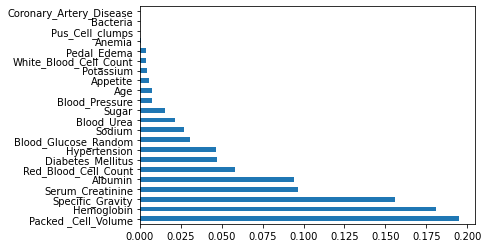

In [73]:
best_rf = best_clf_rf.best_estimator_.fit(train_X,train_y)
feat_importances = pd.Series(best_rf.feature_importances_,index=train_X.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [71]:
xgb = XGBClassifier(random_state=1)
param_grid  = { 'n_estimators': [450,500,550],
                'colsample_bytree':[0.75,0.8,0.85],
                'max_depth':[None],
                'reg_alpha':[1],
                'reg_lambda':[2,5,10],
                'subsample':[0.55,0.6,0.65],
                'learning_rate':[0.5],
                'gamma':[.5,1,2],
                'min_child_weight':[0.01],
                'sampling_method':['uniform']}
              
clf_xgb= GridSearchCV(xgb,param_grid = param_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_xgb = clf_xgb.fit(train_X,train_y)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best score is :  0.9875
Best parameter is :  {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


<AxesSubplot:>

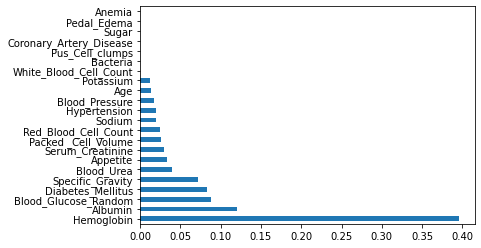

In [72]:
best_xgb = best_clf_xgb.best_estimator_.fit(train_X,train_y)
feat_importances = pd.Series(best_xgb.feature_importances_,index=train_X.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [78]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_
voting_clf_hard = VotingClassifier(estimators=[('knn',best_knn),('rf',best_rf),('svc',best_svc)],voting='hard')
voting_clf_soft = VotingClassifier(estimators=[('knn',best_knn),('rf',best_rf),('svc',best_svc)],voting='soft')

voting_clf_all = VotingClassifier(estimators=[('knn',best_knn),('rf',best_rf),('svc',best_svc),('lr',best_knn)],voting='hard')
voting_clf_xgb = VotingClassifier(estimators=[('knn',best_knn),('rf',best_rf),('svc',best_svc),('lr',best_knn),('xgb',best_xgb)],voting='hard')


cv1=cross_val_score(voting_clf_hard,train_X,train_y)
cv2=cross_val_score(voting_clf_soft,train_X,train_y)
cv3=cross_val_score(voting_clf_all,train_X,train_y)
cv4=cross_val_score(voting_clf_xgb,train_X,train_y)

print('voting_clf_hard : ',cv1)
print('voting_clf_hard mean : ',cv1.mean())

print('voting_clf_soft : ',cv2)
print('voting_clf_soft mean : ',cv2.mean())

print('voting_clf_all : ',cv3)
print('voting_clf_all mean : ',cv3.mean())

print('voting_clf_xgb : ',cv4)
print('voting_clf_xgb mean : ',cv4.mean())



voting_clf_hard :  [1.       1.       0.984375 0.984375 0.984375]
voting_clf_hard mean :  0.990625
voting_clf_soft :  [0.984375 0.984375 0.96875  0.984375 0.953125]
voting_clf_soft mean :  0.975
voting_clf_all :  [0.8125   0.875    0.828125 0.828125 0.78125 ]
voting_clf_all mean :  0.825
voting_clf_xgb :  [1.       1.       0.984375 0.984375 0.984375]
voting_clf_xgb mean :  0.990625


In [79]:
# fit all the model 

voting_clf_hard.fit(train_X,train_y)
voting_clf_soft.fit(train_X,train_y)
voting_clf_all.fit(train_X,train_y)
voting_clf_xgb.fit(train_X,train_y)


best_rf.fit(train_X,train_y)

preds_rf = best_rf.predict(val_X)
preds_voting_hard = voting_clf_hard.predict(val_X)
preds_voting_soft = voting_clf_soft.predict(val_X)
preds_voting_all = voting_clf_all.predict(val_X)
preds_voting_xgb = voting_clf_xgb.predict(val_X)